In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 12.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=b45e42e5d805afff85801124e7ae2adfad11e283cd6da2aed50d24b467861a0e
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
# import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("/content/Midterm - WineBeerSpirits_ Reviews (2).xlsx")


In [ ]:
df["review"] = df['reviews.text'].str.lower()


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["review"] = df["review"].apply(lambda text: remove_stopwords(text))


In [ ]:
import string
import re
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["review"] = df["review"].apply(lambda text: remove_punctuation(text))

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["review"] = df["review"].apply(lambda text: remove_emoji(text))

In [ ]:
def remove_urls(text):
  
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    try:
        return url_pattern.sub(r'', text)
    except:
        print(text)
    
df["review"] = df["review"].apply(lambda text: remove_urls(text))


In [ ]:
import re, nltk, spacy, string
import pandas as pd 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px



/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:



In [ ]:
#df

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel



/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [ ]:
# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# # Convert to list
# data = df['review'].values.tolist()

# # Remove new line characters
# sample_list =df["review"].astype('str') 
# data = []

# for element in sample_list:
#     data.append(element.strip())

# # Remove distracting single quotes

# data = (df["reviewText"].astype('str')).replace("'","")

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['review']))

print(data_words[:1])

[['fantastic', 'white', 'wine', 'occasion']]


In [ ]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(data_words, min_count=10, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=65)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['fantastic', 'white', 'wine', 'occasion']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
# Remove Stop Words
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_trigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])





In [ ]:
print(data_lemmatized[:2])

[['fantastic', 'white', 'wine', 'occasion'], ['tart', 'refresh']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1)]]


In [ ]:
print(type(corpus))

<class 'list'>


In [ ]:
id2word[0]

'fantastic'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('fantastic', 1), ('occasion', 1), ('white', 1), ('wine', 1)]]

In [ ]:
%%time

# Build LDA model
import numpy as np
from numpy.random import randint
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=42,
                                           update_every=5,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

CPU times: user 1.78 s, sys: 1.88 ms, total: 1.78 s
Wall time: 1.78 s


In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.035*"wine" + 0.019*"great" + 0.016*"taste" + 0.013*"bottle" + '
  '0.011*"purchase" + 0.011*"would" + 0.010*"sweet" + 0.010*"love" + '
  '0.010*"order" + 0.009*"try"'),
 (1,
  '0.045*"wine" + 0.025*"good" + 0.019*"love" + 0.016*"taste" + 0.014*"use" + '
  '0.014*"buy" + 0.014*"great" + 0.012*"bottle" + 0.012*"order" + '
  '0.010*"make"'),
 (2,
  '0.030*"wine" + 0.017*"taste" + 0.017*"good" + 0.011*"red" + 0.010*"case" + '
  '0.008*"qvc" + 0.007*"say" + 0.007*"bottle" + 0.006*"quality" + '
  '0.006*"½i_½i"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.8451736861307335

Coherence Score:  0.48664511236792124


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.133824 -0.018729       1        1  63.233510
1      0.073546  0.091417       2        1  13.872044
0     -0.048975 -0.143764       3        1  12.153376
2     -0.158394  0.071075       4        1  10.741070, topic_info=         Term        Freq       Total Category  logprob  loglift
41       love  123.000000  123.000000  Default  30.0000  30.0000
229  purchase   69.000000   69.000000  Default  29.0000  29.0000
191       try   71.000000   71.000000  Default  28.0000  28.0000
586       tea   20.000000   20.000000  Default  27.0000  27.0000
123       buy   89.000000   89.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
3        wine    6.946167  368.770617   Topic4  -4.9635  -1.7409
21       good    5.909605  148.866253   Topic4  -5.1251  -0.9954
540       say    5.078261   50.103144   Topic4  -5.2767  -0.0580
17     bottle    5.275076  109.950715   Topic4  -5.2387  -0.8059
241      rise    4.679019   24.767137   Topic4  -5.3586   0.5647

[284 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
303       1  0.991115   absolutely
1568      4  0.882560  acceptablei
533       1  0.970006        again
169       1  0.500439          ago
169       3  0.417032          ago
...     ...       ...          ...
379       2  0.176834         year
379       3  0.176834         year
379       4  0.117890         year
1638      2  0.523325        ½i_½i
1638      4  0.457910        ½i_½i

[386 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

## Building LDA Mallet Model

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet
import os

In [ ]:
import os
os.environ.update({"MALLET_HOME":r"C:\mallet-2.0.8"})

print(os.environ['MALLET_HOME'])
mallet_path = os.environ['MALLET_HOME'] + r'\bin\mallet' # update this path
print(mallet_path)

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=4, id2word=id2word)

result = (ldamallet.show_topics(num_topics=3, num_words=10,formatted=False))
for each in result:
    print (each)

C:\mallet-2.0.8
C:\mallet-2.0.8\bin\mallet


CalledProcessError: ignored

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('tv', 0.017189041985734094),
   ('screen', 0.014578206393424192),
   ('device', 0.014365841775867885),
   ('make', 0.013072916016039774),
   ('app', 0.010686937077613022),
   ('feature', 0.010012367115963573),
   ('update', 0.009344043172477546),
   ('time', 0.008794393574096513),
   ('video', 0.008788147555933093),
   ('review', 0.008338434248166793)]),
 (1,
  [('product', 0.10187923233876453),
   ('buy', 0.05137209096016796),
   ('work', 0.04295176981991306),
   ('mobile', 0.03303811692344087),
   ('bad', 0.02608894934500399),
   ('money', 0.02608155661353757),
   ('time', 0.02445515569092468),
   ('month', 0.02040393884732531),
   ('issue', 0.019354170979093355),
   ('book', 0.01882928704497738)]),
 (2,
  [('phone', 0.13641630606272873),
   ('camera', 0.07392326173626705),
   ('battery', 0.07309185416980354),
   ('charge', 0.035783257939287605),
   ('display', 0.027737589441778558),
   ('day', 0.027403717111938883),
   ('fast', 0.02295208604740987),
   ('performance', 0.022

## How to find the optimal number of topics for LDA?

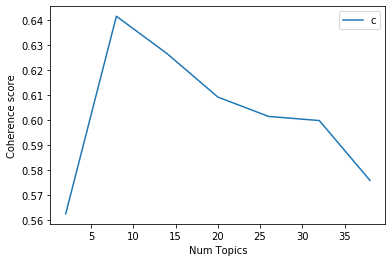

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5624
Num Topics = 8  has Coherence Value of 0.6417
Num Topics = 14  has Coherence Value of 0.6267
Num Topics = 20  has Coherence Value of 0.6092
Num Topics = 26  has Coherence Value of 0.6015
Num Topics = 32  has Coherence Value of 0.5998
Num Topics = 38  has Coherence Value of 0.5758


In [ ]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.171*"battery" + 0.077*"charge" + 0.069*"life" + 0.066*"day" + '
  '0.054*"good" + 0.053*"camera" + 0.050*"fast" + 0.029*"performance" + '
  '0.023*"hour" + 0.019*"average"'),
 (1,
  '0.035*"book" + 0.023*"give" + 0.020*"make" + 0.016*"apple" + 0.015*"thing" '
  '+ 0.015*"review" + 0.014*"read" + 0.014*"find" + 0.014*"year" + '
  '0.013*"time"'),
 (2,
  '0.035*"tv" + 0.029*"device" + 0.021*"app" + 0.019*"update" + '
  '0.016*"feature" + 0.016*"option" + 0.015*"support" + 0.014*"smart" + '
  '0.013*"video" + 0.012*"play"'),
 (3,
  '0.088*"work" + 0.066*"mobile" + 0.052*"bad" + 0.048*"time" + 0.044*"issue" '
  '+ 0.038*"problem" + 0.037*"buy" + 0.031*"month" + 0.027*"call" + '
  '0.023*"poor"'),
 (4,
  '0.203*"product" + 0.066*"buy" + 0.052*"money" + 0.029*"worth" + '
  '0.022*"delivery" + 0.021*"purchase" + 0.018*"happy" + 0.017*"service" + '
  '0.017*"receive" + 0.014*"return"'),
 (5,
  '0.295*"phone" + 0.102*"price" + 0.076*"great" + 0.040*"good" + '
  '0.037*"amazing" + 0.03

## Finding the dominant topic in each sentence

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.1250,"battery, charge, life, day, good, camera, fast...",I liked it
1,1,7.0,0.2385,"camera, display, screen, back, pro, front, lig...",I bought the phone on Amazon and been using my...
2,2,5.0,0.1561,"phone, price, great, good, amazing, range, fea...","Awesome book at reasonable price, must buy ......"
3,3,6.0,0.1356,"good, quality, nice, sound, picture, excellent...",good
4,4,1.0,0.1830,"book, give, make, apple, thing, review, read, ...","The book is fine,not bad,contains nice concept..."
5,5,2.0,0.1568,"tv, device, app, update, feature, option, supp...",Nice tv and pic quality .good custmer srrvice ...
6,6,2.0,0.2295,"tv, device, app, update, feature, option, supp...",The iPhone 7 is legitimately among the most in...
7,7,0.0,0.1394,"battery, charge, life, day, good, camera, fast...","20000 mAH, what more you need. Super product"
8,8,0.0,0.1445,"battery, charge, life, day, good, camera, fast...",The company should give more Bettany backup an...
9,9,5.0,0.1394,"phone, price, great, good, amazing, range, fea...",Very good phone


## Find the most representative document for each topic

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3512,"battery, charge, life, day, good, camera, fast...",When I am trying to charge with realme 5w char...
1,1.0,0.7297,"book, give, make, apple, thing, review, read, ...","Not everyone dares to follow their dream, even..."
2,2.0,0.7275,"tv, device, app, update, feature, option, supp...",I had this device in wish list since launch. W...
3,3.0,0.3729,"work, mobile, bad, time, issue, problem, buy, ...","hey Guy's, I ordered SAMSUNG M30s on 29 Sep an..."
4,4.0,0.3950,"product, buy, money, worth, delivery, purchase...",Please dont buy Samsung products.Samsung Cheat...


## Topic distribution across documents

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"battery, charge, life, day, good, camera, fast...",10725.0,0.1761
1.0,7.0,"camera, display, screen, back, pro, front, lig...",5793.0,0.0951
2.0,5.0,"phone, price, great, good, amazing, range, fea...",4412.0,0.0725
3.0,6.0,"good, quality, nice, sound, picture, excellent...",6193.0,0.1017
4.0,1.0,"book, give, make, apple, thing, review, read, ...",9902.0,0.1626
...,...,...,...,...
60884.0,0.0,"battery, charge, life, day, good, camera, fast...",NaN,NaN
60885.0,6.0,"good, quality, nice, sound, picture, excellent...",NaN,NaN
60886.0,4.0,"product, buy, money, worth, delivery, purchase...",NaN,NaN
60887.0,0.0,"battery, charge, life, day, good, camera, fast...",NaN,NaN
